<a href="https://colab.research.google.com/github/Ganesh-DSML/flipitnews/blob/main/FlipitNews_NLP_BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [7]:
data = 'https://drive.google.com/uc?id=1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u&export=download'

try:
    df = pd.read_csv(data)
except pd.errors.ParserError:
    df = pd.read_csv(data, sep=';')
    df = pd.read_csv(data, sep='\t')

df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


In [9]:
r = 'No. of Rows'
c = 'No. Of Columns'
print(f'{r}: {df.shape[0]}')
print(f'{c}: {df.shape[1]}')

No. of Rows: 2225
No. Of Columns: 2


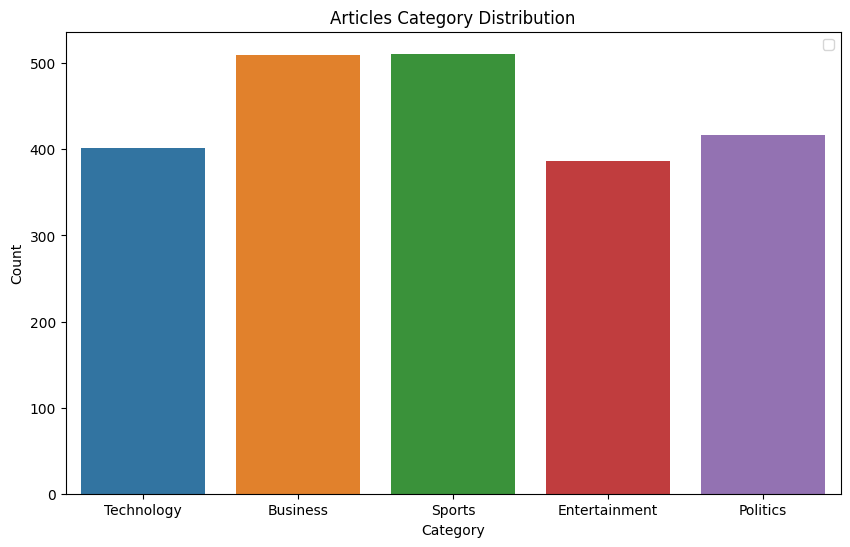

In [13]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = df['Category'], hue = 'Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Articles Category Distribution')
plt.show()

In [15]:
before_preprocessing = df['Article'][1]

In [27]:
import re
stop_words = list(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
#data preprocessing
def preprocess_text(text_data):
  text_data = text_data.lower()
  text_data = re.sub('[^a-zA-Z0-9]', " ",text_data)
  text_data = nltk.word_tokenize(text_data)
  text_data = [lemmatizer.lemmatize(word) for word in text_data if word not in stop_words]
  text_data = ' '.join(text_data)
  return text_data

In [28]:
df['Article_new'] = df['Article'].apply(preprocess_text)
df.head()

,Category,Article,Article_new
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...
...,...,...,...
2220,Business,cars pull down us retail figures us retail sal...,car pull u retail figure u retail sale fell 0 ...
2221,Politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy ex chatshow ...
2222,Entertainment,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert u band rem an...
2223,Politics,how political squabbles snowball it s become c...,political squabble snowball become commonplace...


In [30]:
after_preprocessing = df['Article_new'][1]

In [37]:
print('Sample Before Preprocessing:')
before_preprocessing

Before Preprocessing:


'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

In [38]:
print('Sample After Preprocessing:')
after_preprocessing

Sample After Preprocessing:


'worldcom bos left book alone former worldcom bos bernie ebbers accused overseeing 11bn 5 8bn fraud never made accounting decision witness told juror david myers made comment questioning defence lawyer arguing mr ebbers responsible worldcom problem phone company collapsed 2002 prosecutor claim loss hidden protect firm share mr myers already pleaded guilty fraud assisting prosecutor monday defence lawyer reid weingarten tried distance client allegation cross examination asked mr myers ever knew mr ebbers make accounting decision aware mr myers replied ever know mr ebbers make accounting entry worldcom book mr weingarten pressed replied witness mr myers admitted ordered false accounting entry request former worldcom chief financial officer scott sullivan defence lawyer trying paint mr sullivan admitted fraud testify later trial mastermind behind worldcom accounting house card mr ebbers team meanwhile looking portray affable bos admission pe graduate economist whatever ability mr ebbers t

In [45]:
print('List of Preprocessed elements:')
for word in before_preprocessing.split():
  if word not in after_preprocessing.split():
    print(word,end = ' <> ')

List of Preprocessed elements:
boss <> books <> boss <> who <> is <> of <> an <> $11bn <> (£5.8bn) <> decisions <> a <> has <> jurors. <> the <> comments <> under <> by <> lawyers <> who <> have <> been <> that <> was <> not <> for <> s <> problems. <> the <> in <> and <> prosecutors <> that <> losses <> were <> to <> the <> s <> shares. <> has <> to <> and <> is <> prosecutors. <> on <> to <> his <> from <> the <> allegations. <> during <> he <> if <> he <> an <> . <> not <> that <> i <> am <> of <> replied. <> did <> you <> to <> an <> into <> books <> pressed. <> no <> the <> witness. <> has <> that <> he <> entries <> at <> the <> of <> sullivan. <> lawyers <> have <> been <> to <> who <> has <> and <> will <> in <> the <> as <> the <> s <> of <> cards. <> are <> to <> him <> as <> an <> boss <> who <> by <> his <> own <> is <> more <> than <> economist. <> his <> abilities <> from <> a <> into <> a <> $160bn <> telecoms <> and <> of <> the <> 1990s. <> s <> problems <> as <> and <